In [25]:
import pandas as pd
df = pd.read_excel('Cr-poisoning.xlsx')

In [26]:
import numpy as np

In [27]:
X1 = df['log pO2 /bar'].tolist()
X2 = df['log CrO3 /bar'].tolist()
X = np.c_[X1,X2]
y = df['reaction product']

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
clf = SVC(gamma=0.5, kernel='linear',C = 20)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1, 0, 0, 0, 0],
       [2, 4, 0, 0, 0],
       [0, 0, 4, 0, 0],
       [0, 0, 3, 1, 0],
       [0, 0, 0, 1, 4]])

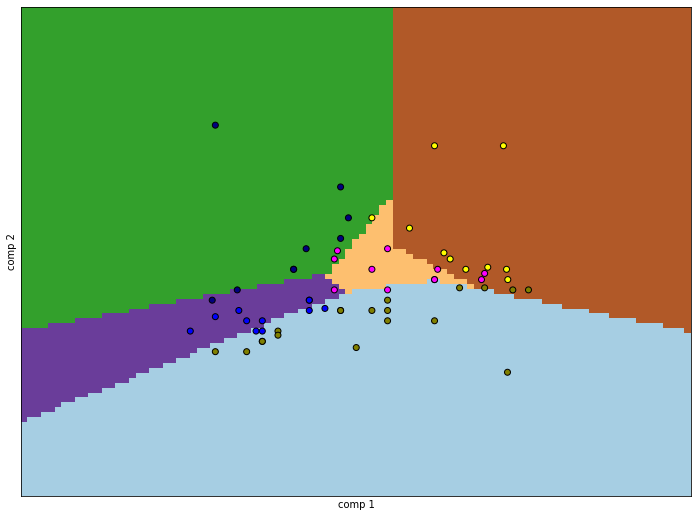

In [34]:
import matplotlib.pyplot as plt
from random import sample
idx = sample(list(df.index), int(df.shape[0]))
h = .02
x_min, x_max  = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
encoder = {'SrO': 1, 'SrCrO3': 2, 'Sr3Cr2O8': 3,'Sr2CrO4':4,'SrCrO4':5}
Z = np.array([encoder[z] for z in Z]).reshape(xx.shape)
plt.figure(figsize=(12, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
col_map = {'SrO': 'olive', 'SrCrO3': 'navy', 'Sr3Cr2O8': 'magenta','Sr2CrO4':"blue",'SrCrO4':"yellow"}
plt.scatter(X_train[:, 0], X_train[:, 1], c= [col_map[lb] for lb in y_train], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('comp 1')
plt.ylabel('comp 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

In [35]:
len(X_train[:, 0])

60

In [36]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras import optimizers
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [37]:
le = LabelEncoder()
le.fit(y_train)
y_tarin = le.transform(y_train)

In [38]:
y_test = le.transform(y_test)

In [39]:
y_tarin = np_utils.to_categorical(y_tarin)

In [40]:
model = Sequential()
model.add(Dense(5, input_shape = [2,], activation = 'tanh'))
model.add(Dense(5, activation = 'softmax'))

In [41]:
sgd = optimizers.SGD(lr=0.1, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])

In [42]:
history = model.fit(X_train,y_tarin,epochs=100,batch_size = 4)

Epoch 1/100
60/60 [==============================] - 0s 2ms/step - loss: 1.6677 - acc: 0.1667
Epoch 2/100
60/60 [==============================] - 0s 551us/step - loss: 1.6160 - acc: 0.2833
Epoch 3/100
60/60 [==============================] - 0s 637us/step - loss: 1.5937 - acc: 0.3167
Epoch 4/100
60/60 [==============================] - 0s 368us/step - loss: 1.5805 - acc: 0.3167
Epoch 5/100
60/60 [==============================] - 0s 436us/step - loss: 1.5718 - acc: 0.3167
Epoch 6/100
60/60 [==============================] - 0s 392us/step - loss: 1.5621 - acc: 0.3167
Epoch 7/100
60/60 [==============================] - 0s 363us/step - loss: 1.5369 - acc: 0.3167
Epoch 8/100
60/60 [==============================] - 0s 352us/step - loss: 1.5192 - acc: 0.3167
Epoch 9/100
60/60 [==============================] - 0s 396us/step - loss: 1.5104 - acc: 0.3333
Epoch 10/100
60/60 [==============================] - 0s 480us/step - loss: 1.4720 - acc: 0.3333
Epoch 11/100
60/60 [=====================

60/60 [==============================] - 0s 278us/step - loss: 0.5406 - acc: 0.8000
Epoch 86/100
60/60 [==============================] - 0s 466us/step - loss: 0.5461 - acc: 0.8167
Epoch 87/100
60/60 [==============================] - 0s 270us/step - loss: 0.5445 - acc: 0.8333
Epoch 88/100
60/60 [==============================] - 0s 411us/step - loss: 0.5508 - acc: 0.7833
Epoch 89/100
60/60 [==============================] - 0s 405us/step - loss: 0.5407 - acc: 0.8333
Epoch 90/100
60/60 [==============================] - 0s 396us/step - loss: 0.5489 - acc: 0.8667
Epoch 91/100
60/60 [==============================] - 0s 314us/step - loss: 0.5428 - acc: 0.8167
Epoch 92/100
60/60 [==============================] - 0s 382us/step - loss: 0.5372 - acc: 0.8000
Epoch 93/100
60/60 [==============================] - 0s 341us/step - loss: 0.5367 - acc: 0.8333
Epoch 94/100
60/60 [==============================] - 0s 409us/step - loss: 0.5392 - acc: 0.8333
Epoch 95/100
60/60 [=======================

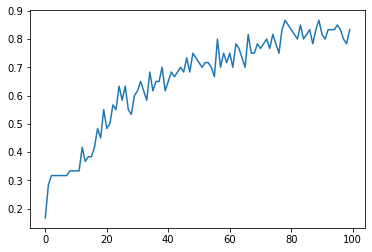

In [43]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
plt.plot(history.history['acc'])

In [44]:
y_pred

array([[2.0002057e-03, 1.5238880e-01, 3.7729901e-01, 4.6829242e-01,
        1.9644738e-05],
       [7.2600949e-04, 5.8818271e-04, 3.3975479e-07, 6.1877814e-05,
        9.9862361e-01],
       [1.7173819e-03, 1.4984331e-01, 3.1533659e-01, 5.3308314e-01,
        1.9582438e-05],
       [1.8671941e-02, 4.2686954e-01, 3.1415829e-01, 2.3959625e-01,
        7.0396974e-04],
       [2.4570439e-02, 3.4549227e-01, 5.0665665e-01, 1.2281902e-01,
        4.6168512e-04],
       [1.9525647e-03, 1.8598000e-02, 1.3179956e-05, 7.1913130e-03,
        9.7224492e-01],
       [6.3578695e-01, 2.1338033e-02, 3.3232194e-01, 1.2902421e-04,
        1.0424085e-02],
       [1.1903766e-03, 1.1069995e-02, 9.8338228e-01, 4.3565948e-03,
        8.1462832e-07],
       [2.3452453e-01, 3.1678405e-01, 4.2431867e-01, 1.4303394e-02,
        1.0069301e-02],
       [2.7666358e-02, 2.0531449e-01, 7.2760749e-01, 3.9190490e-02,
        2.2119135e-04],
       [9.0487180e-03, 1.4312777e-02, 9.7619230e-01, 4.4201888e-04,
        4.13

In [45]:
y_pred = [item.argmax() for item in y_pred]

In [46]:
accuracy_score(y_test, y_pred)

0.85

In [47]:
#X = df.iloc[:, 0:2]
X_0=X[ :, 0]
X_1=X[:,1]
y_letransf = le.fit_transform(y.values)

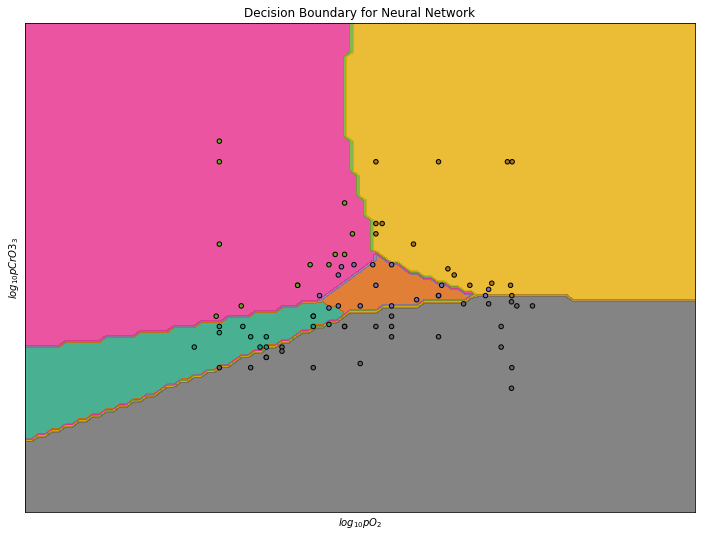

In [48]:
import matplotlib.pyplot as plt
from random import sample
idx = sample(list(df.index), int(df.shape[0]))
h = .02
x_min, x_max  = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array([item.argmax() for item in Z]).reshape(xx.shape)
# #Put the result into a color plot
#encoder = {'SrO': 1, 'SrCrO3': 2, 'Sr3Cr2O8': 3,'Sr2CrO4':4,'SrCrO4':5}
#Z = np.array([encoder[z] for z in Z]).reshape(xx.shape)
plt.figure(figsize=(12, 9))
plt.contourf(xx, yy, Z, cmap=plt.cm.get_cmap('Dark2'), alpha=0.8)

# Plot also the training points
col_map = {'SrO': 'olive', 'SrCrO3': 'navy', 'Sr3Cr2O8': 'magenta','Sr2CrO4':"blue",'SrCrO4':"yellow"}
#plt.scatter(X1[:, 0], X2[:, 1], c= [col_map[lb] for lb in df['reaction product']], edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(X_0, X_1, c=y_letransf, s=20, cmap=plt.cm.get_cmap('Dark2'), edgecolors='k')
plt.ylabel('$log_{10}pCrO3_3$')
plt.xlabel('$log_{10}pO_2$')
plt.title("Decision Boundary for Neural Network")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
#plt.savefig('classification_NN.png')
plt.show()


In [22]:
y_hat = model.predict(X_test)

y_hat = np.array([item.argmax() for item in y_hat]).reshape(y_test.shape)
print(y_test)
print(y_hat)

confusion_mat = confusion_matrix(y_test, y_hat)

[3 4 3 1 1 4 0 2 1 2 2 2 1 3 1 3 4 4 4 1]
[3 4 3 1 1 4 0 2 1 2 2 2 1 3 1 3 4 4 4 1]


In [23]:
def print_confusion_matrix(confusion_matrix, class_names, figsize=(10, 7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix.
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

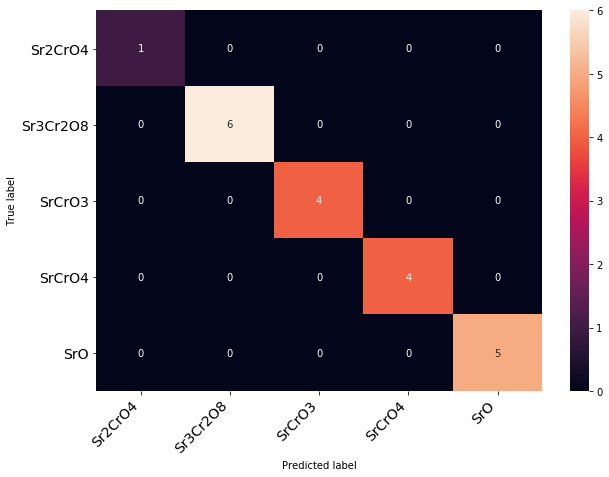

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
print_confusion_matrix(confusion_mat, ['Sr2CrO4','Sr3Cr2O8', 'SrCrO3', 'SrCrO4', 'SrO'])
plt.savefig("confusion_matrix_NN.png")